In [5]:
import os
import requests

# dir = '../input/be project/COVID-19_Radiography_Datase/COVID-19_Radiography_Dataset'
dir =r'C:\Users\Ayush\Desktop\ be project\COVID-19_Radiography_Dataset'  

# looping in folders
for folder in os.listdir(dir):
    # looping inside subfolders
    if os.path.isdir(os.path.join(dir, folder)):
        for subfolder in os.listdir(os.path.join(dir, folder)):
          # print name of subfolder and len
          print(folder, subfolder, len(os.listdir(os.path.join(dir, folder, subfolder))))

COVID images 3616
COVID masks 3616
Lung_Opacity images 6012
Lung_Opacity masks 6012
Normal images 10192
Normal masks 10192
Viral Pneumonia images 1345
Viral Pneumonia masks 1345


In [6]:
# import librairies
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import tensorflow as tf

In [7]:
"""print(dir.describe())
print("========================================")
print("missing values:",dir.isnull().sum())"""

'print(dir.describe())\nprint("========================================")\nprint("missing values:",dir.isnull().sum())'

COVID images
COVID masks
image shape (256, 256, 3)


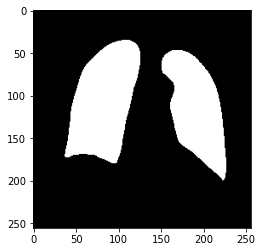

Lung_Opacity images
Lung_Opacity masks
image shape (256, 256, 3)


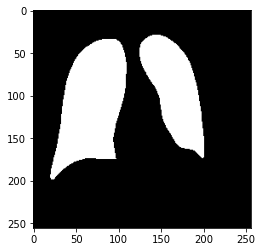

Normal images
Normal masks
image shape (256, 256, 3)


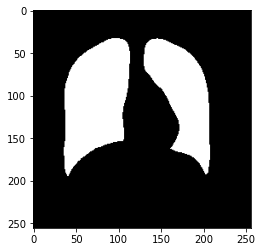

Viral Pneumonia images
Viral Pneumonia masks
image shape (256, 256, 3)


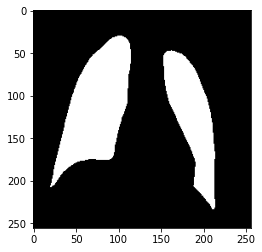

In [9]:
# display image from each folder
# looping in folders
for folder in os.listdir(dir):
    # looping inside subfolders
    if os.path.isdir(os.path.join(dir, folder)):
        for subfolder in os.listdir(os.path.join(dir, folder)):
          # print name of subfolder and len
          print(folder, subfolder)
        img = cv2.imread(os.path.join(dir, folder, subfolder, os.listdir(os.path.join(dir, folder, subfolder))[0]))
        print('image shape {}'.format(img.shape))  
        plt.imshow(img)
        plt.show()
        #except(TypeError)as e:

In [10]:
dir

'C:\\Users\\Ayush\\Desktop\\ be project\\COVID-19_Radiography_Dataset'

In [11]:
# creat path for images folders
#fetching folder names
pathes = []
for folder in os.listdir(dir):
    if os.path.isdir(os.path.join(dir, folder)):
        pathes.append(os.path.join(dir, folder))
pathes

['C:\\Users\\Ayush\\Desktop\\ be project\\COVID-19_Radiography_Dataset\\COVID',
 'C:\\Users\\Ayush\\Desktop\\ be project\\COVID-19_Radiography_Dataset\\Lung_Opacity',
 'C:\\Users\\Ayush\\Desktop\\ be project\\COVID-19_Radiography_Dataset\\Normal',
 'C:\\Users\\Ayush\\Desktop\\ be project\\COVID-19_Radiography_Dataset\\Viral Pneumonia']

In [12]:
# load images
def load_images(path, urls, target):
    images = []
    labels = []
    for i in range(len(urls)) :
        img_path = path + '/' + urls[i]
        img = cv2.imread(img_path)
        img = img / 255.0
        img = cv2.resize(img, (50, 50))
        images.append(img)
        labels.append(target)
    images = np.array(images)
    return images, labels

In [13]:
# load images and labels
# get covid path
for folder in os.listdir(dir):
    if os.path.isdir(os.path.join(dir, folder)):
        if folder == 'COVID':
            for subfolder in os.listdir(os.path.join(dir, folder)):
                if subfolder == 'images':
                    covid_path = os.path.join(dir, folder, subfolder)
                    covid_urls = os.listdir(covid_path)
                    covid_images, covid_target = load_images(covid_path , covid_urls, 1)

In [14]:
for folder in os.listdir(dir):
    if os.path.isdir(os.path.join(dir, folder)):
        if folder == 'Normal':
            for subfolder in os.listdir(os.path.join(dir, folder)):
                if subfolder == 'images':
                    normal_path = os.path.join(dir, folder, subfolder)
                    normal_urls = os.listdir(normal_path)
                    normal_images, normal_target = load_images(normal_path , normal_urls, 0)

In [15]:
for folder in os.listdir(dir):
    if os.path.isdir(os.path.join(dir, folder)):
        if folder == 'Viral Pneumonia':
            for subfolder in os.listdir(os.path.join(dir, folder)):
                if subfolder == 'images':
                    viral_pneumonia_path = os.path.join(dir, folder, subfolder)
                    viral_pneumonia_urls = os.listdir(viral_pneumonia_path)
                    viral_pneumonia_images, viral_pneumonia_target = load_images(viral_pneumonia_path , viral_pneumonia_urls, 2)


In [16]:
covid_images.shape

(3616, 50, 50, 3)

In [17]:
normal_images.shape

(10192, 50, 50, 3)

In [18]:
viral_pneumonia_images.shape

(1345, 50, 50, 3)

In [19]:
data = np.r_[covid_images, normal_images, viral_pneumonia_images]

In [20]:
data.shape

(15153, 50, 50, 3)

In [21]:
targets = np.r_[covid_target, normal_target, viral_pneumonia_target]
targets.shape

(15153,)

In [22]:
# import train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.25)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [24]:
# inialize the model
# model = Sequential([
#     Conv2D(32, 3, input_shape=(50,50,3), activation='relu'),
#     MaxPooling2D(),
#     Conv2D(16, 3, activation='relu'),
#     MaxPooling2D(),
#     Conv2D(16, 3, activation='relu'),
#     MaxPooling2D(),
#     Flatten(),
#     Dense(512, activation='relu'),
#     Dense(512, activation='relu'),
#     Dense(1, activation='sigmoid')
# ])

model = Sequential()
model.add(Conv2D(32, 3, input_shape=(50,50,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, 3, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, 3, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, 3, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [25]:
#summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 16)          2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 16)         0

In [26]:
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50


C:\Users\Ayush\AppData\Roaming\Python\Python39\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


356/356 [==============================] - 33s 88ms/step - loss: 0.6457 - accuracy: 0.7099 - val_loss: 0.5362 - val_accuracy: 0.7612
Epoch 2/50
356/356 [==============================] - 43s 121ms/step - loss: 0.4951 - accuracy: 0.7693 - val_loss: 0.3788 - val_accuracy: 0.8432
Epoch 3/50
356/356 [==============================] - 32s 91ms/step - loss: 0.4018 - accuracy: 0.8256 - val_loss: 0.4104 - val_accuracy: 0.8387
Epoch 4/50
356/356 [==============================] - 27s 75ms/step - loss: 0.3446 - accuracy: 0.8508 - val_loss: 0.4125 - val_accuracy: 0.8298
Epoch 5/50
356/356 [==============================] - 26s 74ms/step - loss: 0.3164 - accuracy: 0.8637 - val_loss: 0.3084 - val_accuracy: 0.8678
Epoch 6/50
356/356 [==============================] - 33s 94ms/step - loss: 0.2910 - accuracy: 0.8735 - val_loss: 0.3066 - val_accuracy: 0.8720
Epoch 7/50
356/356 [==============================] - 30s 83ms/step - loss: 0.2741 - accuracy: 0.8857 - val_loss: 0.3135 - val_accuracy: 0.8712
Ep

In [28]:
def get_metrics(history):
    fig = plt.figure(figsize = (10,10))
    plt.subplot(2,2,1)
    plt.plot(history.history["accuracy"], label = "training accuracy")
    plt.plot(history.history["val_accuracy"], label = "test accuracy")
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")

    plt.subplot(2,2,2)
    plt.plot(history.history["loss"], label = "train loss")
    plt.plot(history.history["val_loss"], label = "test loss")
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel("Loss")


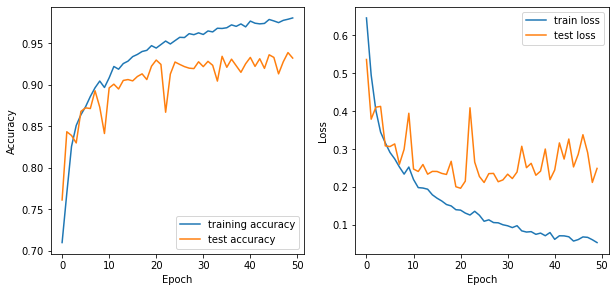

In [29]:
history = model.history
get_metrics(history)